<a href="https://colab.research.google.com/github/vrhughes/DS4002-Group13/blob/main/SCRIPTS/TwitterCCData_VH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cloning Git Location
! git clone https://github.com/vrhughes/DS4002-Group13/

Cloning into 'DS4002-Group13'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 104 (delta 39), reused 27 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (104/104), 7.05 MiB | 6.37 MiB/s, done.
Resolving deltas: 100% (39/39), done.


In [3]:
# Reading in the csv of data
data = pd.read_csv('/content/DS4002-Group13/DATA/twitter_sentiment_data.csv')
data.head()

# data is a DataFrame (43943, 3)
# In the sentiment column 1 is pro/believes, -1 is anti/non-believer, 0 is neutral

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [4]:
# Basic Cleaning Of "data"

# Deleting tweetid column
data.drop(['tweetid'], axis = 1, inplace = True)
print("Dropped tweetid column")
print(data.head())

Dropped tweetid column
   sentiment                                            message
0         -1  @tiniebeany climate change is an interesting h...
1          1  RT @NatGeoChannel: Watch #BeforeTheFlood right...
2          1  Fabulous! Leonardo #DiCaprio's film on #climat...
3          1  RT @Mick_Fanning: Just watched this amazing do...
4          2  RT @cnalive: Pranita Biswasi, a Lutheran from ...


In [5]:
# Finding most frequently used words (called tokens)
import nltk
nltk.download('punkt_tab')

# Adding "tokenized_tweet" column using nltk.word_tokenize for each tweet
data['tokenized_tweet'] = data['message'].apply(nltk.word_tokenize)
data.head()

# The tokenized_tweet column contains series of tokens

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,sentiment,message,tokenized_tweet
0,-1,@tiniebeany climate change is an interesting h...,"[@, tiniebeany, climate, change, is, an, inter..."
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,"[RT, @, NatGeoChannel, :, Watch, #, BeforeTheF..."
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,"[Fabulous, !, Leonardo, #, DiCaprio, 's, film,..."
3,1,RT @Mick_Fanning: Just watched this amazing do...,"[RT, @, Mick_Fanning, :, Just, watched, this, ..."
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...","[RT, @, cnalive, :, Pranita, Biswasi, ,, a, Lu..."


In [39]:
# Preparting to count tokens by frequency
# Importing necessary packages
from collections import Counter
from nltk.corpus import stopwords
import string

# Creating stopwords to exclude from the token counting
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print(stop_words)

# Including punctuation in stopwords
stop_words.update(list(string.punctuation))
print(stop_words)

# Adding stopwords specific to our data
tw_stopwords = ['rt', 'https', "'", "'s", "n't", "...", "…", 'http', "’", 'amp', 'would', 'one', 'q', 'you', 'make', "'m", "//t.co/sjofonã¢â‚¬â¦", "‘", 'said', 'say', 'says']
incl_stop = stop_words.union(tw_stopwords)

# Excluding stopwords specific to our data
excl_stop = {'against', "isn't", 'doesn', "don't", "shouldn't"}
new_stop = set([word for word in incl_stop if word not in excl_stop])

# Print out stopwords
print(new_stop)

{'the', 'before', 'doesn', 'about', 'why', 'be', 'does', 'yourself', 'an', 'shouldn', "that'll", 'so', 'had', 'a', 'wouldn', 'll', 'that', 'of', 'being', 'only', 'aren', 'do', "wouldn't", "you'll", 'as', 'against', 'most', 'some', 're', 'no', "couldn't", "didn't", 'again', "hasn't", 'but', 'themselves', 'under', "you've", 'through', 'm', 'their', "haven't", 'his', 'until', 'it', 'all', 'shan', 'couldn', 'my', 'himself', 'don', 'were', 'if', 'theirs', 'we', 'is', 'over', 'itself', 't', 'ours', "shouldn't", 'yours', 'same', 'further', 'once', 'been', 'have', 'both', 'your', 'which', 'while', 'her', 'for', 'our', 'those', 'in', 'where', 'are', 'with', "wasn't", 'having', 'and', 'not', 'd', 'will', 'each', 'to', 'up', 'needn', "it's", 'there', "needn't", 'few', 'haven', "shan't", 'too', "doesn't", 'whom', 'who', 'off', 'yourselves', "isn't", 'doing', 'hers', 'any', 'he', 'didn', 'here', 'herself', 'won', 'wasn', 'nor', 'you', 'on', "you'd", 'when', "hadn't", 'weren', 's', 'then', "aren't",

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
# Flattening/simplifying all the tokens in the dataframe to one list
all_tokens = [word.lower() for tokens in data['tokenized_tweet'] for word in tokens if word.lower() not in new_stop]

# Counting the frequency
token_freq = Counter(all_tokens)

# Most used tokens
most_common_tokens = token_freq.most_common(30)

# Creating a dataframe with the token frequency
all_df = pd.DataFrame(most_common_tokens, columns = ['Token', 'Frequency'])

# Display
#for word, count in most_common_tokens:
#    print(f"{word}: {count}")

In [41]:
# Counting tokens in for sentiment 0 (neutral on climate change)
neutral = data['sentiment'].isin([0])
neutral_tweets = data[neutral]

# Flattening/simplifying all the tokens in the dataframe to one list
neutral_tokens = [word.lower() for tokens in neutral_tweets['tokenized_tweet'] for word in tokens if word.lower() not in new_stop]

# Counting the frequency
neutral_token_freq = Counter(neutral_tokens)

# Most used tokens
neutral_common_tokens = neutral_token_freq.most_common(30)

# Creating a dataframe with the token frequency
neutral_df = pd.DataFrame(neutral_common_tokens, columns = ['Token', 'Frequency'])

# Display
#for word, count in neutral_common_tokens:
#    print(f"{word}: {count}")

In [42]:
# Counting tokens in for sentiment 1 (pro/believes in climate change)
pro = data['sentiment'].isin([1])
pro_tweets = data[pro]

# Flattening/simplifying all the tokens in the dataframe to one list
pro_tokens = [word.lower() for tokens in pro_tweets['tokenized_tweet'] for word in tokens if word.lower() not in new_stop]

# Counting the frequency
pro_token_freq = Counter(pro_tokens)

# Most used tokens
pro_common_tokens = pro_token_freq.most_common(30)

# Creating a dataframe with the token frequency
pro_df = pd.DataFrame(pro_common_tokens, columns = ['Token', 'Frequency'])


# Display
#for word, count in pro_common_tokens:
#    print(f"{word}: {count}")

In [43]:
# Counting tokens in for sentiment -1 (anti/does not believe in climate change)
anti = data['sentiment'].isin([-1])
anti_tweets = data[anti]

# Flattening/simplifying all the tokens in the dataframe to one list
anti_tokens = [word.lower() for tokens in anti_tweets['tokenized_tweet'] for word in tokens if word.lower() not in new_stop]

# Counting the frequency
anti_token_freq = Counter(anti_tokens)

# Most used tokens
anti_common_tokens = anti_token_freq.most_common(30)

# Creating a dataframe with the token frequency
anti_df = pd.DataFrame(anti_common_tokens, columns = ['Token', 'Frequency'])

# Display
#for word, count in anti_common_tokens:
 #   print(f"{word}: {count}")

In [44]:
# Counting tokens in for sentiment 2 (news source)
news = data['sentiment'].isin([2])
news_tweets = data[news]

# Flattening/simplifying all the tokens in the dataframe to one list
news_tokens = [word.lower() for tokens in news_tweets['tokenized_tweet'] for word in tokens if word.lower() not in new_stop]

# Counting the frequency
news_token_freq = Counter(news_tokens)

# Most used tokens
news_common_tokens = news_token_freq.most_common(30)

# Creating a dataframe with the token frequency
news_df = pd.DataFrame(news_common_tokens, columns = ['Token', 'Frequency'])

# Display
#for word, count in news_common_tokens:
 #   print(f"{word}: {count}")

Do percentage comparison of tokens across 4 categories


<Axes: xlabel='Samples', ylabel='Counts'>

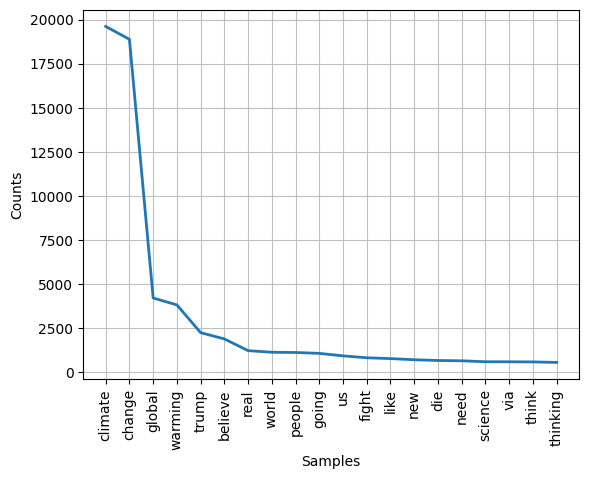

In [37]:
# Pro sentiment (believes in climate change) analysis
import matplotlib#
# Creating dataframe with token frequency
#pro_token_df = pd.DataFrame(p_common_tokens, columns = ['Token', 'Frequency'])

pro_freq = nltk.FreqDist(pro_tokens)

pro_freq.plot(20, cumulative=False)


<ipython-input-38-43ea2487da7d>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
<ipython-input-38-43ea2487da7d>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
<ipython-input-38-43ea2487da7d>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
<ipython-input-38-43ea2487da7d>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
<ipython-input-38-43ea2487da7d>:23: UserWarning: set_ticklabels() should only be

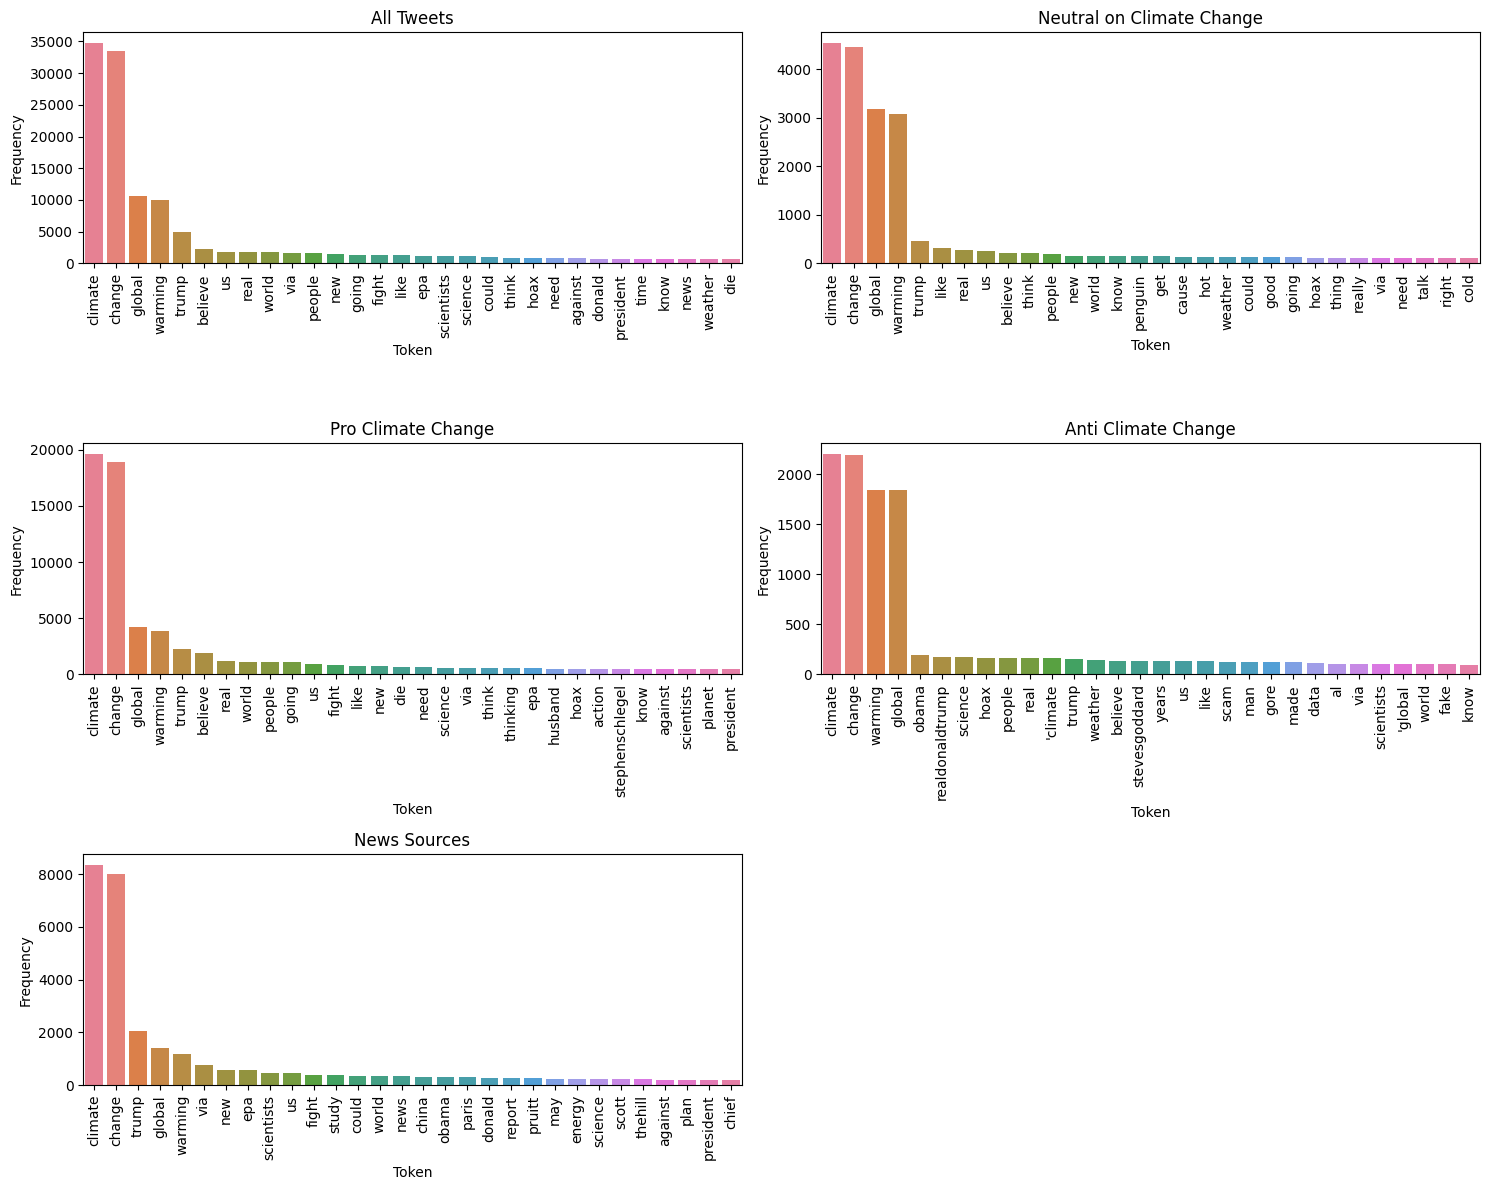

In [38]:
# Plots of each category, token frequency

# Create fig and axes
fig, axes = plt.subplots(3, 2, figsize=(15, 12))  # Adjust grid size as needed (3 rows, 2 columns)

# Flatten axes array for easy indexing (if needed)
axes = axes.flatten()

# List of datasets and titles
datasets = [
    (all_df, "All Tweets"),
    (neutral_df, "Neutral on Climate Change"),
    (pro_df, "Pro Climate Change"),
    (anti_df, "Anti Climate Change"),
    (news_df, "News Sources"),
]

# Plot each dataset in its subplot
for i, (df, title) in enumerate(datasets):
    sns.barplot(data=df, x='Token', y='Frequency', hue='Token', ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)

# Hide the last subplot if there's an empty one
if len(datasets) < len(axes):
    fig.delaxes(axes[-1])

# Display
plt.tight_layout()
plt.show()


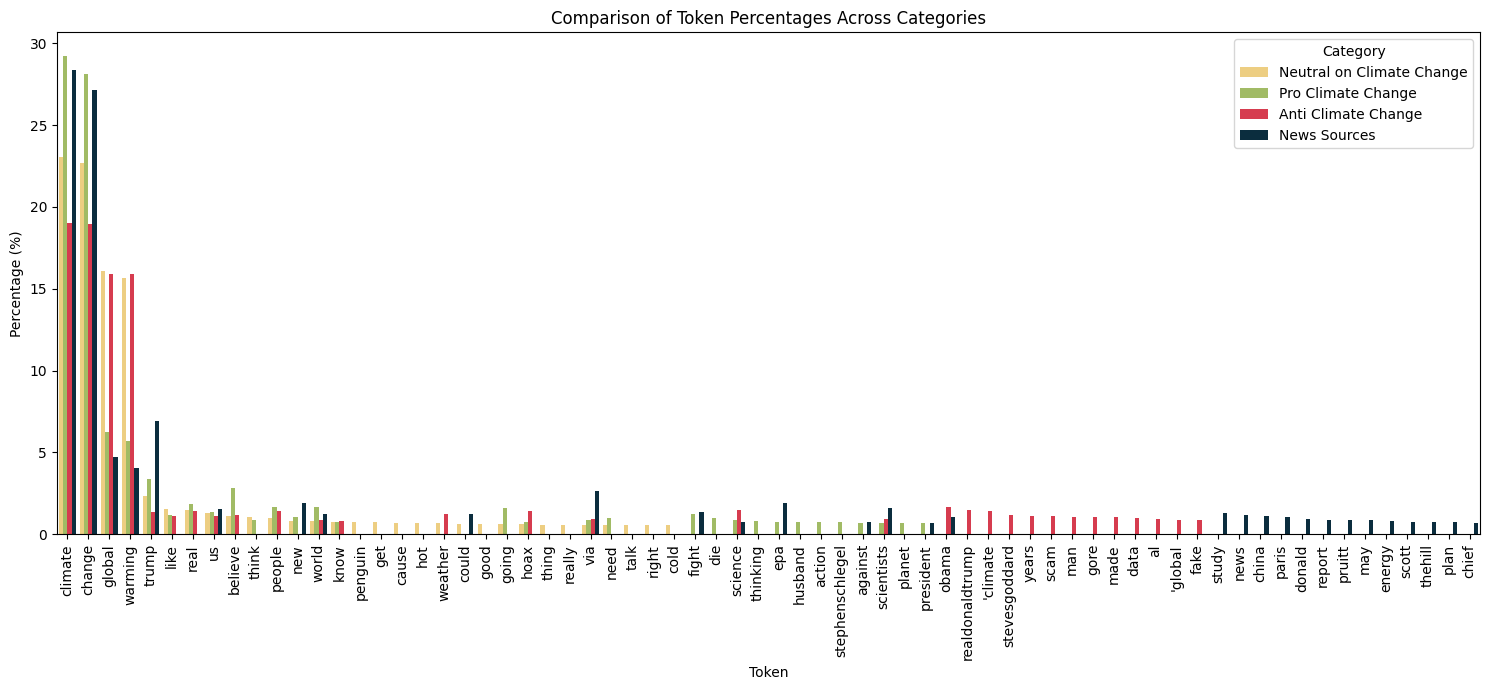

In [45]:
# Final overarching graph showing percentages of token frequency for each category
# up to the 30th most common token

# 1. Defining datasets and computing percentages
datasets = {
   # "All Tweets": all_df,
    "Neutral on Climate Change": neutral_df,
    "Pro Climate Change": pro_df,
    "Anti Climate Change": anti_df,
    "News Sources": news_df,
}

# Initialization
percentage_df = []

# Looping
for category, df in datasets.items():
    total_count = df["Frequency"].sum()  # Get total frequency count for normalization
    df["Percentage"] = (df["Frequency"] / total_count) * 100  # Convert to percentage
    df["Category"] = category  # Label each dataset
    percentage_df.append(df[["Token", "Percentage", "Category"]])

# Combine all datasets into one DataFrame
percentage_df = pd.concat(percentage_df)

# Making color palette because automatic colors are ugly
colors = {
    "Neutral on Climate Change": "#ffd670",  # Yellow
    "Pro Climate Change": "#a7c957",  # Green
    "Anti Climate Change": "#ef233c",  # Red
    "News Sources": "#023047",  # Dark Blue
}

# 2. Create a grouped bar chart
plt.figure(figsize=(15, 7))
sns.barplot(data=percentage_df, x="Token", y="Percentage", hue="Category", palette = colors)

# 3. Graph specs
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.title("Comparison of Token Percentages Across Categories")
plt.ylabel("Percentage (%)")
plt.xlabel("Token")
plt.legend(title="Category")
plt.tight_layout()

# 4. Display
plt.show()


<ipython-input-46-24a123f4e167>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(top_n, "Percentage"))


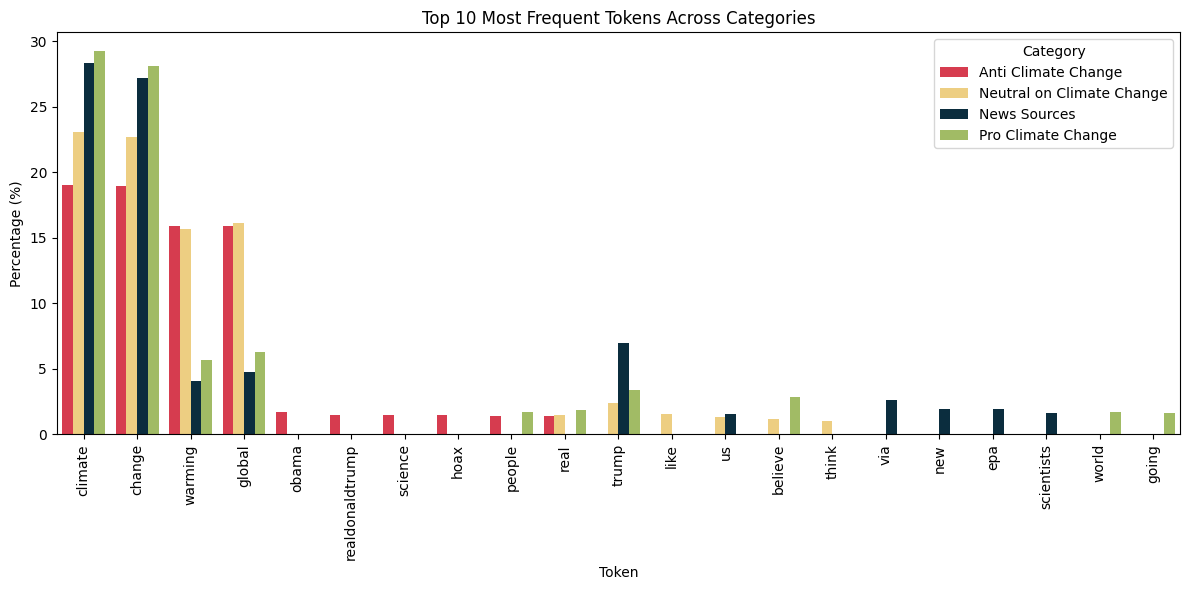

In [46]:
# Customizable version of above, change up to what most common token you want

top_n = 10  # Choose the number of most frequent tokens to display

# Get top N tokens for each category
top_tokens = (
    percentage_df.groupby("Category")
    .apply(lambda x: x.nlargest(top_n, "Percentage"))
    .reset_index(drop=True)
)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_tokens, x="Token", y="Percentage", hue="Category", palette = colors)

# Graph specs
plt.xticks(rotation=90)
plt.title(f"Top {top_n} Most Frequent Tokens Across Categories")
plt.ylabel("Percentage (%)")
plt.xlabel("Token")
plt.legend(title="Category")
plt.tight_layout()
plt.show()
